# Setting up the envrionment

Loading in the required packages (note you may need to add them using Pkg.add first). Multi-fractal functions can be loaded in using the include statement.

In [28]:
using DataFrames, CSV, Polynomials, GLM, Unitful, Statistics, Plots, Loess

include("../multi_fractals.jl");

# Creating some data

The function below creates a multifractal timeseries of data. It takes three arguements:
- length_ts: the length of the timeseries
- cascade_steps: the number of cascade steps to use
- distribution: the type of distribution to draw from

Using these parameters it performs a cascade process to create a multifractal timeseries. For each step in the cascade, it divides the time series into segments of a certain length (`segment_length`), and multiplies each segment by a random number drawn from `distribution`. The length of the segments decreases with each step of the cascade, starting from `length_ts` and halving at each step (down to a minimum of 1). This introduces long-range correlations into the data.

In [29]:
using Random, Distributions

function generate_multifractal_ts(length_ts, cascade_steps, distribution)
    ts = rand(length_ts)  # Start with a normal random time series
    for step in 1:cascade_steps
        segment_length = max(length_ts ÷ 2^step, 1)
        for i in 1:segment_length:length_ts
            multiplier = rand(distribution)
            ts[i:min(i+segment_length-1, length_ts)] .*= multiplier
        end
    end
    return ts
end

# Parameters
length_ts = 2^13 # 8192
cascade_steps = 10
distribution = LogNormal(0, 0.5)  # Example distribution

# Generate the time series
ts = generate_multifractal_ts(length_ts, cascade_steps, distribution)


8192-element Vector{Float64}:
 1.0178274100986608
 0.536239123427346
 1.0811696909919968
 0.2198814970156665
 0.6108698101349201
 0.25844680766838773
 1.0481189385229586
 0.01621504568759877
 0.8340265277238746
 0.7692753072508538
 ⋮
 0.021247116332991832
 0.036767174605590036
 0.015325012337917727
 0.05143347629803032
 0.026890285668258993
 0.07790802218589173
 0.06870670969750904
 0.03437374429112963
 0.015138436452767929

## Chhabra Jensen method

Below is the implementation of the Chhabra Jensen (direct) method for calculating the multifractal spectrum. 

See: Chhabra A, Jensen RV. Direct determination of the f(α) singularity spectrum. Physical Review Letters. 1989;62(12):1327–1330. doi:10.1103/PhysRevLett.62.1327.

 It takes 4 arguements:
- ts: the timeseries to calculate the spectrum
- qValues: the order of the spectrum to calculate
- scales: the scales to calculate the spectrum over
- plot (kwarg): whether to plot the spectrum or not

In [30]:
# parameters
q = LinRange(-15,15,31)
exponents = LinRange(2,8,7)
scales = round.(2 .^exponents)

# call the function
cj_results = ChhabraJensen(ts, q, scales; plot = true)

Dict{String, Any} with 9 entries:
  "alpha"       => [1.69504, 1.69445, 1.6936, 1.69238, 1.69066, 1.68825, 1.6849…
  "Rsqr_Dq"     => [0.979491, 0.979539, 0.979611, 0.979719, 0.979879, 0.980113,…
  "Rsqr_alpha"  => [0.978883, 0.978677, 0.978419, 0.978091, 0.977673, 0.977137,…
  "falpha"      => [-0.0777811, -0.0693068, -0.0578219, -0.0426037, -0.0228389,…
  "plot"        => Plot{Plots.GRBackend() n=2}
  "Rsqr_falpha" => [0.212021, 0.162892, 0.107863, 0.0541044, 0.013742, 0.000120…
  "q"           => LinRange{Float64}(-15.0, 15.0, 31)
  "mfw"         => 1.16421
  "Dq"          => [1.58424, 1.57687, 1.5685, 1.55892, 1.54787, 1.53499, 1.5198…

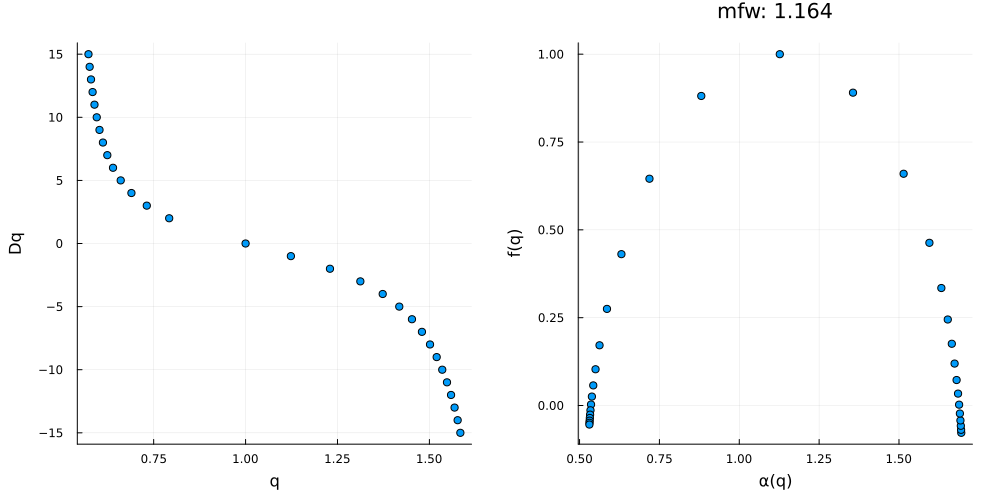

In [31]:
cj_results["plot"] |> display

## MFDFA

Below is the implementation of the MFDFA method for calculating the multifractal spectrum. 

See: Kantelhardt JW, Zschiegner SA, Koscielny-Bunde E, Havlin S, Bunde A, Stanley HE. Multifractal detrended fluctuation analysis of nonstationary time series. Physica A: Statistical Mechanics and its Applications. 2002;316(1-4):87–114. doi:10.1016/S0378-4371(02)01383-3.

It takes five arguements:
- ts: the timeseries to calculate the spectrum
- q: the order of the spectrum to calculate
- scale: the scale to calculate the spectrum over
- m: the order of the polynomial to use in the detrending
- plot (kwarg): whether to plot the spectrum or not


In [32]:
q = LinRange(-15,15,31)
exponents = LinRange(2,8,7)
scales = round.(2 .^exponents)
m = 1

mfdfa_results = mfdfa(ts, q, scales, m; plot = true)

Dict{String, Any} with 9 entries:
  "figure" => Plot{Plots.GRBackend() n=2}
  "Hq_r2"  => [0.986676, 0.986633, 0.986589, 0.986545, 0.986502, 0.986465, 0.98…
  "hq"     => [1.87398, 1.87347, 1.87277, 1.87183, 1.87059, 1.86896, 1.8668, 1.…
  "Fq"     => [0.00066575 0.00459461 … 0.624632 1.25677; 0.00068983 0.00473625 …
  "Hq"     => [1.80283, 1.79775, 1.79192, 1.78518, 1.77731, 1.76798, 1.75676, 1…
  "q"      => LinRange{Float64}(-15.0, 15.0, 31)
  "mfw"    => 1.20438
  "tq"     => [-28.0424, -26.1684, -24.295, -22.4222, -20.5504, -18.6798, -16.8…
  "Dq"     => [-0.0673363, -0.0601508, -0.0510595, -0.039809, -0.026144, -0.009…

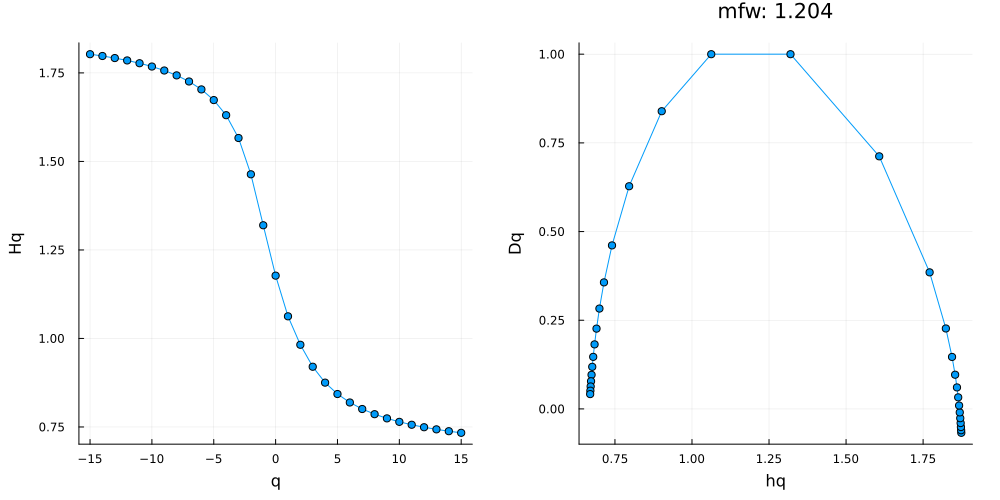

In [33]:
mfdfa_results["figure"] |> display